In [1]:
import pandas as pd
donnees = pd.read_csv("donnees/120-years-of-olympic-history-athletes-and-results.csv")
donnees.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [2]:
#calcul les données manquant
donnees.isnull().sum()


ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [3]:
#traite le donne manquant
#si champs est vide, manque, rempli NaN par None (ou Pas de medal)
donnees['Medal'] = donnees['Medal'].fillna("None")
donnees
#NaN est représenté float valeur

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,None
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",None
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",None
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,None


In [4]:
donnees.shape[0]

271116

In [5]:
#traite valeur manquant s/col Age
data_NaN_supprimes = donnees.dropna()
data_NaN_supprimes = data_NaN_supprimes.drop_duplicates()
data_NaN_supprimes.isnull().sum()
 

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [6]:
#creer nv dataset sans lignes contenant les valeurs manquant
moyennes = donnees[['Age','Weight','Height']].mean()
donnees[['Age','Weight','Height']] = donnees[['Age','Weight','Height']].fillna(moyennes)
data_NaN_remplaces = donnees.drop_duplicates()
print(data_NaN_remplaces.isnull().sum())
print()
print(moyennes)

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

Age        25.556898
Weight     70.702393
Height    175.338970
dtype: float64


In [7]:
print("Tableau avec NaN remplacé")
print(data_NaN_remplaces.shape)

Tableau avec NaN remplacé
(269731, 15)


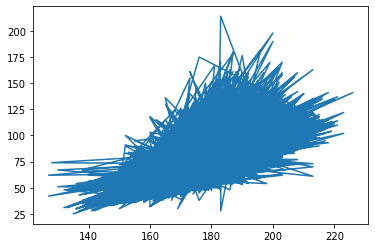

In [8]:
#Crée un nuage des points
import matplotlib.pyplot as plt
#use fonc figure() mermet de creer une nouvelle figure; vierge
plt.figure()
# cmd subplot(111) permet de creer un grill de 1*1 puis placer le graphique à la ps 1
plt.subplot(111)
plt.plot(data_NaN_supprimes["Height"], data_NaN_supprimes["Weight"])
plt.show()

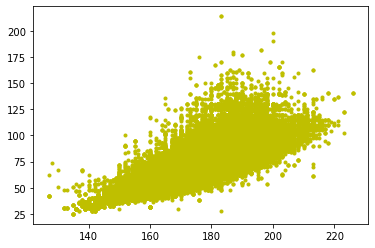

In [9]:
import matplotlib.pyplot as plt
#use fonc figure() mermet de creer une nouvelle figure; vierge
plt.figure()
# cmd subplot(111) permet de creer un grill de 1*1 puis placer le graphique à la ps 1
plt.subplot(111)
plt.plot(data_NaN_supprimes["Height"], data_NaN_supprimes["Weight"],
         marker='.', color="y",linestyle='')
plt.show()

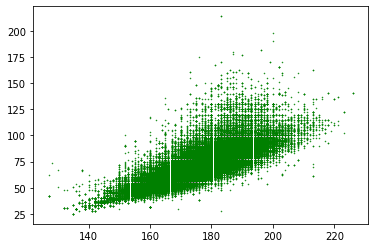

In [10]:
plt.plot(data_NaN_supprimes["Height"], data_NaN_supprimes["Weight"],
         marker='.', color="g",linestyle='',markersize=1)
plt.show()

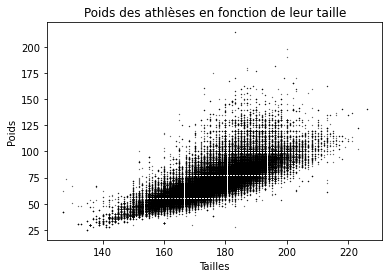

In [11]:
#ajout 1 titre pricipal et des labels aux axes du nuage de point
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(111)
plt.plot(data_NaN_supprimes["Height"], data_NaN_supprimes["Weight"],
         marker='.', color="black",linestyle='', markersize=0.5)
plt.title('Poids des athlèses en fonction de leur taille')
plt.ylabel("Poids")
plt.xlabel("Tailles")
plt.show()

In [12]:
#enregistrer son graphique dans un fichier

import matplotlib.pyplot as plt
plt.figure()
plt.subplot(111)
plt.plot(data_NaN_supprimes["Height"], data_NaN_supprimes["Weight"],
         marker='.', color="black",linestyle='', markersize=0.5)
plt.title('Poids des athlèses en fonction de leur taille')
plt.ylabel("Poids")
plt.xlabel("Tailles")
plt.savefig("athèles.png", dpi=300, format="png")
plt.close() #liberer d'espace de mémoire

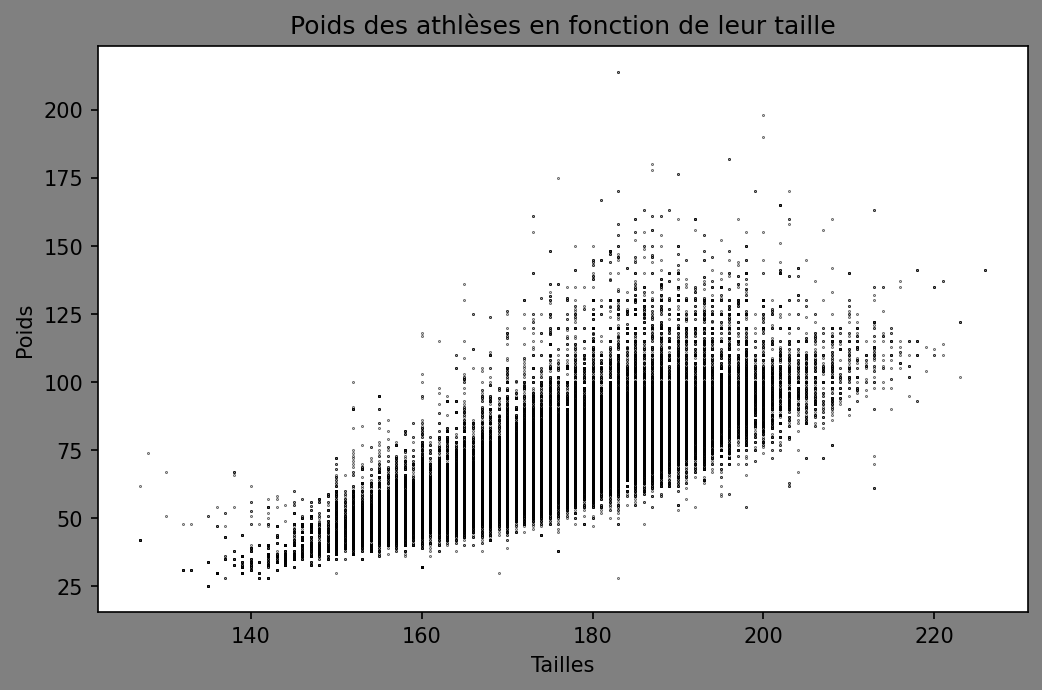

In [13]:
#changer la taille de la fenetre graphique, la résolution de son graphique
import matplotlib.pyplot as plt
#figsize en pouce d'ecran largeur, hauteur
plt.figure(figsize=[8,5], dpi=150, facecolor='grey')
plt.subplot(111)
plt.plot(data_NaN_supprimes["Height"], data_NaN_supprimes["Weight"],
         marker='.', color="black",linestyle='', markersize=0.5)
plt.title('Poids des athlèses en fonction de leur taille')
plt.ylabel("Poids")
plt.xlabel("Tailles")
plt.show()

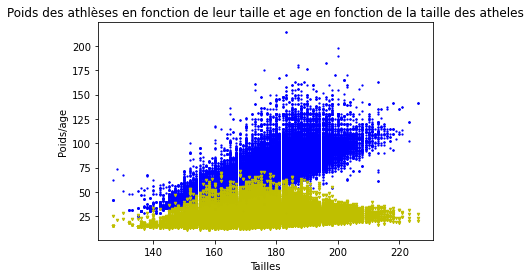

In [14]:
#tracer pls courbues s/une meme graphique (s/meme objet axes)
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(111)

plt.plot(data_NaN_supprimes["Height"], data_NaN_supprimes["Weight"],
         marker='.', color="b",linestyle='', markersize=2.5)
plt.plot(data_NaN_supprimes["Height"], data_NaN_supprimes["Age"],
         marker='v', color="y",linestyle='', markersize=2.5)
plt.title('Poids des athlèses en fonction de leur taille et age en fonction de la taille des atheles')
plt.ylabel("Poids/age")
plt.xlabel("Tailles")
plt.show()

In [15]:
import numpy as np
age_moyen = [np.mean(data_NaN_supprimes["Age"])]*len(data_NaN_supprimes["Height"])

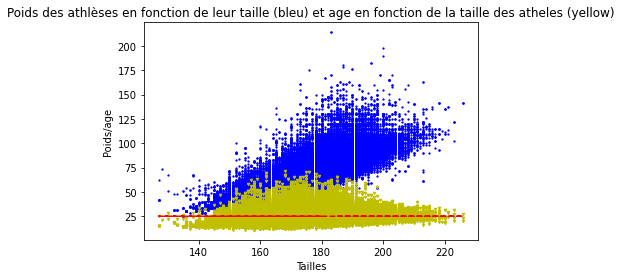

In [16]:
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(111)

plt.plot(data_NaN_supprimes["Height"], data_NaN_supprimes["Weight"],
         marker='.', color="b",linestyle='', markersize=2.5)
plt.plot(data_NaN_supprimes["Height"], data_NaN_supprimes["Age"],
         marker='v', color="y",linestyle='', markersize=2.5)
plt.plot(data_NaN_supprimes["Height"],age_moyen, linestyle='--', color = 'r')
plt.title('Poids des athlèses en fonction de leur taille (bleu) et age en fonction de la taille des atheles (yellow)')
plt.ylabel("Poids/age")
plt.xlabel("Tailles")
plt.show()

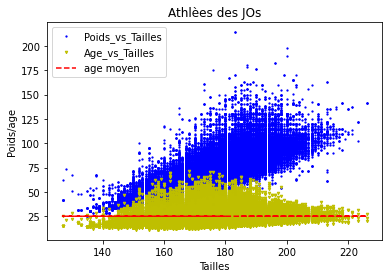

In [17]:
#ajout une légend 
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(111)

#label='Poids_vs_Tailles' => legend du graphique
plt.plot(data_NaN_supprimes["Height"], data_NaN_supprimes["Weight"],
         marker='.', color="b",linestyle='', markersize=2.5, label='Poids_vs_Tailles')
plt.plot(data_NaN_supprimes["Height"], data_NaN_supprimes["Age"],
         marker='v', color="y",linestyle='', markersize=2.5, label='Age_vs_Tailles')
plt.plot(data_NaN_supprimes["Height"],age_moyen, linestyle='--', color = 'r', label='age moyen')

plt.title('Athlèes des JOs')
plt.ylabel("Poids/age")
plt.xlabel("Tailles")

#configure la position de legend
plt.legend(loc='upper left') 
plt.show()

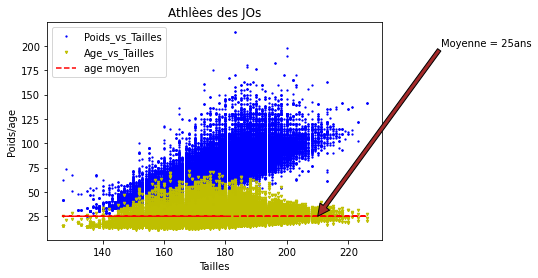

In [18]:
#Annoter son gra av du texte
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(111)

#label='Poids_vs_Tailles' => legend du graphique
plt.plot(data_NaN_supprimes["Height"], data_NaN_supprimes["Weight"],
         marker='.', color="b",linestyle='', markersize=2.5, label='Poids_vs_Tailles')
plt.plot(data_NaN_supprimes["Height"], data_NaN_supprimes["Age"],
         marker='v', color="y",linestyle='', markersize=2.5, label='Age_vs_Tailles')
plt.plot(data_NaN_supprimes["Height"],age_moyen, linestyle='--', color = 'r', label='age moyen')
# xy : les coordonnées du point sur lequel la flèche doit pointer, 
# xytext : les coordonnées où placer le texte grâce à l’option 
# arrowprops : les propriétés de la flèche permettant de relier votre point d’intérêt au texte 
# L’option arrowprops est optionnelle et contient un dictionnaire spécifiant les propriétés de la flèche à afficher.
# Ici, on ne donne qu’une option, on veut que la flèche soit noire, avec facecolor.

plt.annotate("Moyenne = 25ans", xy=[210,25], xytext=[250,200], arrowprops=dict(facecolor='brown'))
plt.title('Athlèes des JOs')
plt.ylabel("Poids/age")
plt.xlabel("Tailles")
plt.legend(loc='upper left') 
plt.show()

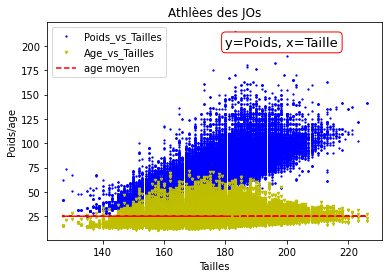

In [19]:
#gerer une annotation, boite de texte dans gra
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(111)

plt.plot(data_NaN_supprimes["Height"], data_NaN_supprimes["Weight"],
         marker='.', color="b",linestyle='', markersize=2.5, label='Poids_vs_Tailles')
plt.plot(data_NaN_supprimes["Height"], data_NaN_supprimes["Age"],
         marker='v', color="y",linestyle='', markersize=2.5, label='Age_vs_Tailles')
plt.plot(data_NaN_supprimes["Height"],age_moyen, linestyle='--', color = 'r', label='age moyen')

#fonc text : ajout une boite de texte
# x,y : où placer ce texte sur la figure. 
# size : définit la taille de ce texte
# bbox : definit une boîte à afficher autour du texte.
# cette option prend un dictionnaire contenant lui-même des options : 
# - le style de boîte à afficher (round)
# - la couleur de l’intérieur de la boîte (white : blanc)
# - la couleur du contour de la boîte (black : noir).

plt.text(180,200,"y=Poids, x=Taille", size=13, bbox=dict(boxstyle="round", fc="white", ec="r"))
plt.title('Athlèes des JOs')
plt.ylabel("Poids/age")
plt.xlabel("Tailles")
plt.legend(loc='upper left') 
plt.show()

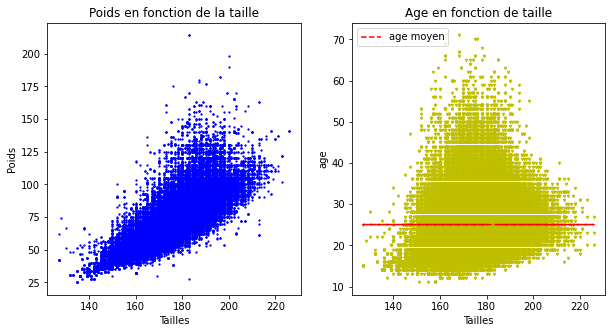

In [20]:
#trace le sous-grap s/une ligne, un col
import matplotlib.pyplot as plt

plt.figure(figsize=[10,5])
plt.subplot(121)

plt.plot(data_NaN_supprimes["Height"], data_NaN_supprimes["Weight"],
         marker='.', color="b",linestyle='', markersize=2.5)
plt.title("Poids en fonction de la taille")
plt.ylabel("Poids")
plt.xlabel("Tailles")
plt.subplot(1,2,2)
plt.plot(data_NaN_supprimes["Height"], data_NaN_supprimes["Age"],
         marker='v', color="y",linestyle='', markersize=2.5)
plt.plot(data_NaN_supprimes["Height"],age_moyen, linestyle='--', color = 'r', label='age moyen')

#
plt.title('Age en fonction de taille')
plt.ylabel("age")
plt.xlabel("Tailles")
plt.legend(loc='upper left') 
plt.show()

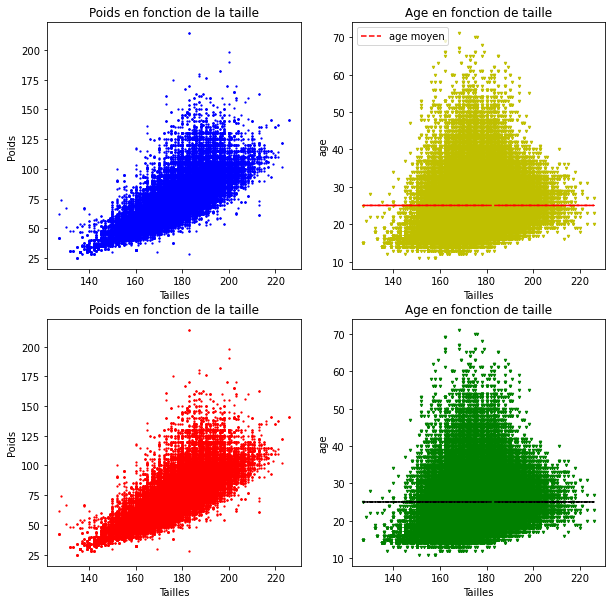

In [21]:
#trace  des sous-grafic s/pls
import matplotlib.pyplot as plt

#déclare 2 ligne, 2 cols et 
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0,0].plot(data_NaN_supprimes["Height"], data_NaN_supprimes["Weight"],
         marker='.', color="b",linestyle='', markersize=2.5)
axs[0,0].set_title("Poids en fonction de la taille")
axs[0,0].set_ylabel("Poids")
axs[0,0].set_xlabel("Tailles")

axs[0,1].plot(data_NaN_supprimes["Height"], data_NaN_supprimes["Age"],
         marker='v', color="y",linestyle='', markersize=2.5)
axs[0,1].plot(data_NaN_supprimes["Height"],age_moyen, linestyle='--', color = 'r', label='age moyen')
axs[0,1].set_title('Age en fonction de taille')
axs[0,1].set_ylabel("age")
axs[0,1].set_xlabel("Tailles")
axs[0,1].legend(loc='upper left') 

axs[1,0].plot(data_NaN_supprimes["Height"], data_NaN_supprimes["Weight"],
         marker='.', color="red",linestyle='', markersize=2.5)
axs[1,0].set_title("Poids en fonction de la taille")
axs[1,0].set_ylabel("Poids")
axs[1,0].set_xlabel("Tailles")

axs[1,1].plot(data_NaN_supprimes["Height"], data_NaN_supprimes["Age"],
         marker='v', color="g",linestyle='', markersize=2.5)
axs[1,1].plot(data_NaN_supprimes["Height"],age_moyen, linestyle='--', color = 'black')
axs[1,1].set_title('Age en fonction de taille')
axs[1,1].set_ylabel("age")
axs[1,1].set_xlabel("Tailles")
plt.show()

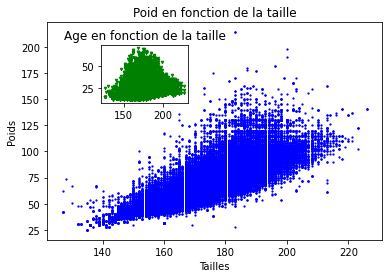

In [22]:
#incruster un obj axes dans une autre
fig, axe_pricipal = plt.subplots()

#pour axe_principal
axe_pricipal.plot(data_NaN_supprimes["Height"], data_NaN_supprimes["Weight"],
         marker='.', color="b",linestyle='', markersize=2.5)
axe_pricipal.set_title("Poid en fonction de la taille")
axe_pricipal.set_ylabel("Poids")
axe_pricipal.set_xlabel("Tailles")

#Un graf à l'intérieur un autre
# fonc add_axes : ajout un axe dans un graf
# positon (x,y) relative à ensemble de la fig princial, la taille du cruste relative fig principal : en %
axe_inscrute = fig.add_axes([0.25, 0.6, .2, .2])
axe_inscrute.plot(data_NaN_supprimes["Height"], data_NaN_supprimes["Age"],
         marker='v', color="g",linestyle='', markersize=2.5)
axe_inscrute.set_title("Age en fonction de la taille")

plt.show()

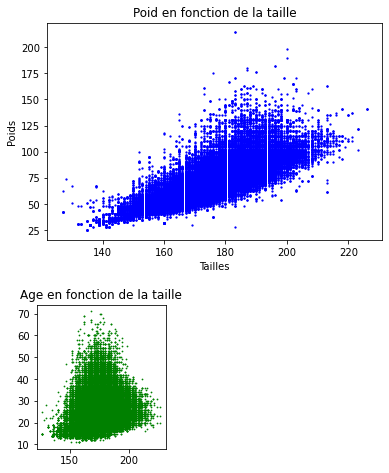

In [23]:
#gerer, deplace incruste
#incruster un obj axes dans une autre
fig, axe_pricipal = plt.subplots()

#config axe_principale
axe_pricipal.plot(data_NaN_supprimes["Height"], data_NaN_supprimes["Weight"],
         marker  ='.', color = "b",linestyle = '', markersize = 2.5)
axe_pricipal.set_title("Poid en fonction de la taille")
axe_pricipal.set_ylabel("Poids")
axe_pricipal.set_xlabel("Tailles")

#déplace axe_inscrute par changer x,y [0,1] ou [0.1, -0.6]
axe_inscrute = fig.add_axes([0.1, -0.6, .3, .5])
axe_inscrute.plot(data_NaN_supprimes["Height"], data_NaN_supprimes["Age"],
         marker = '.', color = "g",linestyle = '', markersize = 1.5)
axe_inscrute.set_title("Age en fonction de la taille")

plt.show()

LES DIFF TYPE DE GRAFIK
4.1. Scatter


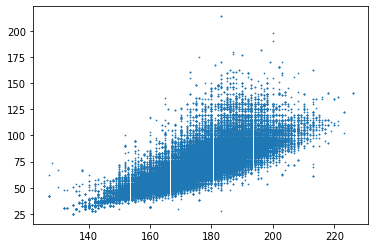

In [24]:
# Scatterplot
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(111)
# s: taille de marker
plt.scatter(data_NaN_supprimes["Height"], data_NaN_supprimes["Weight"], s=0.5)
plt.show()

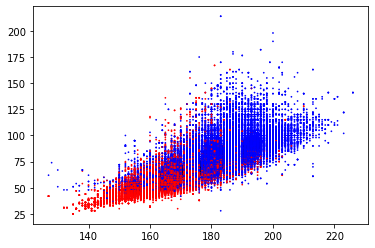

In [25]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(111)
colors =  { 'F' : 'red', 'M' : 'blue' } 
plt.scatter(data_NaN_supprimes["Height"], data_NaN_supprimes["Weight"], c = data_NaN_supprimes['Sex'].apply(lambda x : colors[x]), s = 0.5)

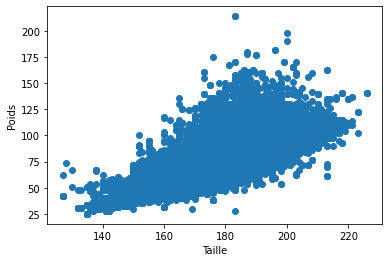

In [26]:
# autre manière: création d'un graph orient obj
# créer un sous-grap et assignation de l'obj figure à la var fig
# et de l'ojt Axes à ax
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(data_NaN_supprimes["Height"], data_NaN_supprimes["Weight"])
ax.set_xlabel('Taille')
ax.set_ylabel('Poids')

plt.show()

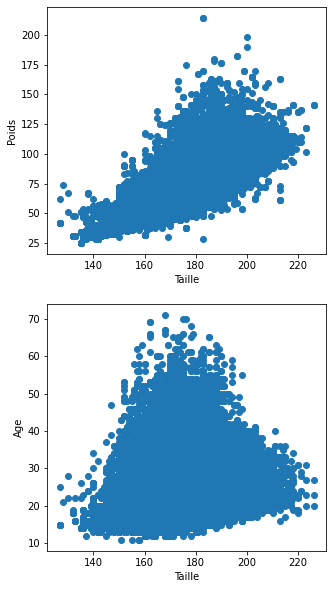

In [27]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.scatter(data_NaN_supprimes["Height"], data_NaN_supprimes["Weight"])
ax1.set_xlabel('Taille')
ax1.set_ylabel('Poids')

ax2.scatter(data_NaN_supprimes["Height"], data_NaN_supprimes["Age"])
ax2.set_xlabel('Taille')
ax2.set_ylabel('Age')

plt.show()

In [28]:
#grafik à barre


import pandas as pd
import numpy

labels_X = data_NaN_remplaces['Team'].value_counts()[:10].keys()
valeurs_Y = data_NaN_remplaces['Team'].value_counts()[:10].values
print(labels_X)
print(valeurs_Y)

Index(['United States', 'France', 'Great Britain', 'Italy', 'Germany',
       'Canada', 'Japan', 'Sweden', 'Australia', 'Hungary'],
      dtype='object')
[17598 11817 11264 10213  9230  9226  8269  8004  7512  6492]


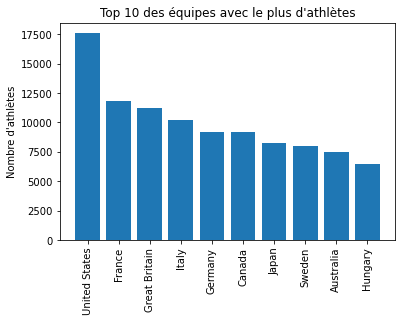

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure()
plt.subplot(111)

#créer series les 10 teams qui ont plus d'athlètes
#value_counts : est trié automatique le résultat en descendant
labels_X = data_NaN_remplaces['Team'].value_counts()[:10].keys()
valeurs_Y = data_NaN_remplaces['Team'].value_counts()[:10].values

#crée graphique à barre
plt.bar(labels_X, valeurs_Y)

plt.xticks(labels_X, rotation=90)
plt.ylabel("Nombre d'athlètes")
plt.title("Top 10 des équipes avec le plus d'athlètes")

plt.show()

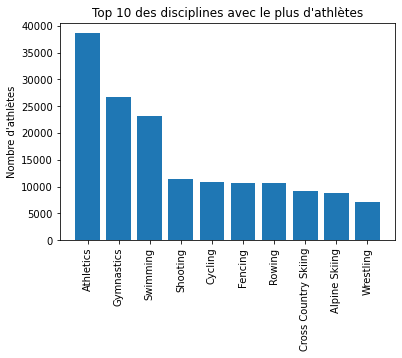

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure()
plt.subplot(111)

#créer series les 10 teams qui ont plus d'athlètes
#value_counts : est trié automatique le résultat en descendant
labels_X = data_NaN_remplaces['Sport'].value_counts()[:10].keys()
valeurs_Y = data_NaN_remplaces['Sport'].value_counts()[:10].values

#crée graphique à barre
plt.bar(labels_X, valeurs_Y)

plt.xticks(labels_X, rotation=90)
plt.ylabel("Nombre d'athlètes")
plt.title("Top 10 des disciplines avec le plus d'athlètes")

plt.show()

In [41]:
# autre manière
#isoler les 3 col intéresse
from numpy import arange

num_cols = [ 'Age', 'Height', 'Weight' ]

#défini axe X
#values[0] convertir une liste, si values: ndarray
bar_heights = data_NaN_remplaces[num_cols].loc[data_NaN_remplaces['Name']=='Edgar Lindenau Aabye'].values[0]

#bar_heights = data_NaN_remplaces[num_cols].loc['Edgar Lindenau Aabye', index_col].values

#defini axe Y
bar_positions = arange(3) + 1
print(bar_heights, "-- ", type(bar_heights))
print(bar_positions)
print(type(bar_positions))
print(num_cols)

[ 34.         175.33896987  70.7023929 ] --  <class 'numpy.ndarray'>
[1 2 3]
<class 'numpy.ndarray'>
['Age', 'Height', 'Weight']


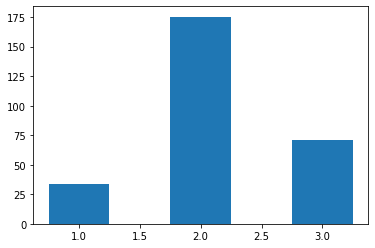

In [35]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()
ax.bar(bar_positions, bar_heights, width=0.5)
plt.show()


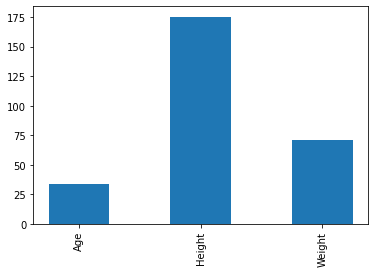

In [36]:
import matplotlib.pyplot as plt 
from numpy import arange

fig, ax = plt.subplots()
ax.bar(bar_positions, bar_heights, width=0.5)

tick_positions = range(1,4)
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols, rotation=90)
plt.show()

In [ ]:
%pwd

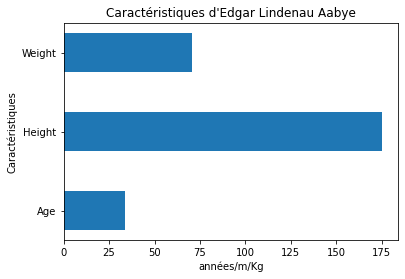

In [37]:
#bar horizontal
import matplotlib.pyplot as plt
from numpy import arange

fig, ax = plt.subplots()
# barh pour créer bar horizontal
ax.barh(bar_positions, bar_heights, 0.5)
tick_positions = range(1, 4)
ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)

ax.set_ylabel('Caractéristiques')
ax.set_xlabel('années/m/Kg')
ax.set_title("Caractéristiques d'Edgar Lindenau Aabye")

plt.show()

# Les histogrammes

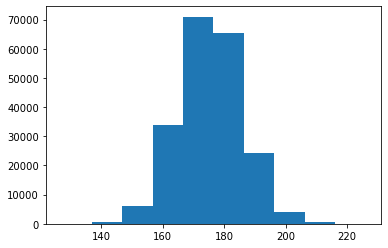

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(data_NaN_supprimes["Height"])

plt.show()

# Grafik à barres groupées

In [50]:
#creer une liste qui contient 10
sports_10 = data_NaN_remplaces['Sport'].value_counts()[:10].keys()

#unstack() index du col, unstack(0) : affiche par ligne
donnees_bar = data_NaN_remplaces.loc[data_NaN_remplaces['Sport'].isin(sports_10)].groupby(["Sport", "Sex"]).size().unstack(1)



In [51]:
donnees_bar

Sex,F,M
Sport,,
Alpine Skiing,3398,5431
Athletics,11666,26958
Cross Country Skiing,3385,5748
Cycling,1394,9433
Fencing,2000,8735
Gymnastics,9129,17578
Rowing,2193,8402
Shooting,1724,9724
Swimming,9850,13345


In [47]:
sports_10

Index(['Athletics', 'Gymnastics', 'Swimming', 'Shooting', 'Cycling', 'Fencing',
       'Rowing', 'Cross Country Skiing', 'Alpine Skiing', 'Wrestling'],
      dtype='object')

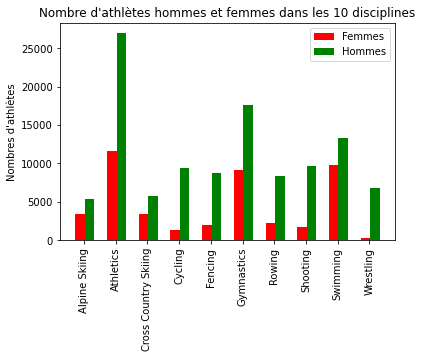

In [56]:
import matplotlib.pyplot as plt

pos = list(range(len(donnees_bar['F'])))
width = 0.25

plt.figure()
plt.subplot(111)

#creer une barre av les données F = Femme à la position pos
plt.bar(pos, donnees_bar['F'], width, color = 'red', label="Femmes")
#cree une barre av les données H,
# à la postion pos+0.25 afin que la barre M soit décalé à droit de la premiere barre F
plt.bar([p + width for p in pos], donnees_bar['M'], width, color = 'green', label="Hommes")
plt.xticks([p + 0.125 for p in pos], donnees_bar.index, rotation = 90)
plt.ylabel("Nombres d'athlètes")
plt.legend()
plt.title("Nombre d'athlètes hommes et femmes dans les 10 disciplines")

plt.show()

# Grafik à barres empilées

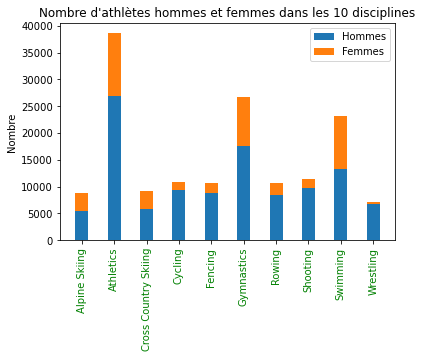

In [59]:
import matplotlib.pyplot as plt

sports_10 = data_NaN_remplaces['Sport'].value_counts()[:10].keys()
donnees_bar = data_NaN_remplaces.loc[data_NaN_remplaces['Sport'].isin(sports_10)].groupby(["Sport", "Sex"]).size().unstack(1)

valeurs_hommes = donnees_bar["M"]
valeurs_femmes = donnees_bar["F"]

width = 0.4

plt.figure()
plt.subplot(111)

plt.bar(donnees_bar.index, valeurs_hommes, width, label='Hommes')
#arg bottom : met cette barre au-dessus de barre d'homme
plt.bar(donnees_bar.index, valeurs_femmes, width, bottom=valeurs_hommes, label='Femmes')
plt.ylabel('Nombre')
plt.title("Nombre d'athlètes par discipline en fonction du genre")

plt.xticks(donnees_bar.index, rotation=90, color="green")

plt.legend()
plt.show()

# box plots

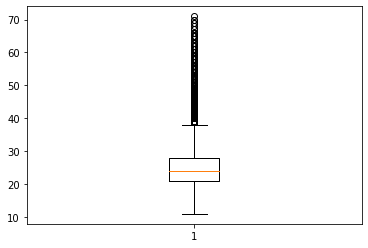

In [61]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(111)
plt.boxplot(data_NaN_supprimes["Age"])
#barre orange est position médianne
plt.show()

Explication de grafik: 
On constate beaucoup de valeurs extrêmes pour la variable âge. En effet, nous l’avions vu précédemment, certaines disciplines artistiques qui avaient lieu aux JO entre 1924 et 1948 regroupaient des athlètes très âgés, ce qui n’est pas représentatif de la majorité des athlètes des JO : en effet, ces disciplines ont très vite disparu, laissant la place à des disciplines nécessitant d’être plus jeune pour exceller. Cela explique ces valeurs extrêmes.

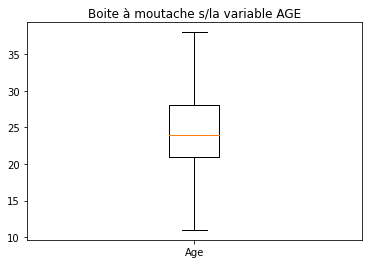

In [63]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(111)
plt.boxplot(data_NaN_supprimes["Age"], showfliers=False)

plt.title("Boite à moutache s/la variable AGE")
plt.xticks([1],['Age'] )
plt.show()

In [64]:
#corr corrélation entre les vars, les liens
#corr travail s/var numérique, valeur quanlitative
data_NaN_supprimes.corr()

,ID,Age,Height,Weight,Year
ID,1.000000,-0.002074,-0.012144,-0.009033,0.007096
Age,-0.002074,1.000000,0.141675,0.212061,0.089607
Height,-0.012144,0.141675,1.000000,0.796589,0.048135
Weight,-0.009033,0.212061,0.796589,1.000000,0.022190
Year,0.007096,0.089607,0.048135,0.022190,1.000000
